# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить способ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел - значение выборочных дисперсий соответствующих (новых) координат.

**Решение:**

1. Для двух главных компонент $w_1, w_2$ функция потерь будет иметь вид:

\begin{equation}
  \begin{aligned}
Loss(W) &= \frac{1}{n}\sum^n_{i=1}||x_i - (z_{i1}w_1 + z_{i2}w_2)||^2 = \\
&= \frac{1}{n}\sum^n_{i=1}((x_i - (z_{i1}w_1 + z_{i2}w_2))^T(x_i - (z_{i1}w_1 + z_{i2}w_2))) = \\
&= \frac{1}{n}\sum^n_{i=1}(x_i^Tx_i - x_i^T(z_{i1}w_1 + z_{i2}w_2) - (z_{i1}w_1 + z_{i2}w_2)^Tx_i + (z_{i1}w_1 + z_{i2}w_2)^T(z_{i1}w_1 + z_{i2}w_2)) = \\
&= \frac{1}{n}\sum^n_{i=1}(x_i^Tx_i - 2z_{i1}x_i^Tw_1 - 2z_{i2}x_i^Tw_2 + z_{i1}^2 + z_{i2}^2)
  \end{aligned}
\end{equation}

2. Нам необходимо минимизировать функцию потерь $Loss(W) → min$. Найдем экстремум:

$\frac{\partial Loss}{\partial z_{i1}} = \frac{1}{n} (2x_{i1} - 2x_i^Tw_1) = 0 ⇒ z_{i1} = x_i^Tw_1$.

$\frac{\partial Loss}{\partial z_{i2}} = \frac{1}{n} (2x_{i2} - 2x_i^Tw_2) = 0 ⇒ z_{i2} = x_i^Tw_2$.

Т.е. счеты $z_i$ - это проекции исходных данных $X$ на соответствующие векторы $w_1, w_2$.

3. Подставим результаты шага 2 в функцию потерь.

\begin{equation}
  \begin{aligned}
Loss(W) &= \frac{1}{n}\sum^n_{i=1}(x_i^Tx_i - 2x_i^Tw_1x_i^Tw_1 - 2x_i^Tw_2x_i^Tw2 + x_i^Tw_1x_i^Tw_1 + x_i^Tw_2x_i^Tw_2) = \\
&= const - \frac{1}{n}\sum^n_{i=1}(w_1^Tx_ix_i^Tw_1 + w_2^Tx_ix_i^Tw_2) = \\
&= const - (w_1^Tcov(x)w_1 + w_2^Tcov(x)w_2)
  \end{aligned}
\end{equation}

Минимизируем функцию потерь по методу Лагранжа:

$\frac{\partial LagLoss}{\partial w_1} = -2cov(x)w_1 + 2λ_1w_1 = 0 ⇒ cov(x)w_1 = \lambda_1w_1$

$\frac{\partial LagLoss}{\partial w_2} = -2cov(x)w_2 + 2λ_2w_2 = 0 ⇒ cov(x)w_2 = \lambda_2w_2$

Т.е. $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы.

4. Тогда по итогам шага 3, $λ_i = \frac{1}{n}\sum^n_{i=1}

*   Новый пункт
*   Новый пункт

$(x_ix_i^Tw_iw_i^T) = \frac{1}{n}\sum^n_{i=1}(w_i(x_ix_i^Tw_i)^T) = \frac{1}{n}\sum^n_{i=1}(w_i(x_i^Tw_i)^Tx_i^T) = \frac{1}{n}\sum^n_{i=1}(z_i^2) = S^2z_i$

Т.е. полученные собственные числа $\lambda_i$ представляют собой значение выборочных дисперсий соответствующих (новых) координат.

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

**Решение:**

Пусть $X$ - матрица размера $(n, n)$. Возьмем матрицу $A = XX^T$. Она симметрична, т.к. $A^T = (XX^T)^T = (X^T)^TX^T = XX^T = A$.

Взьмем в $\mathbb R^n$ некоторый ортонормальный базис $v$. По спектральной теореме, в $\mathbb R^n$ есть ортонормированный базис $u$ из собственных векторов $A$. $A$ задает в $\mathbb R^n$ симметричное преобразование. Приведем это к базису $u$ с помощью матрицы перехода $U$: $\mathbb A = U^{-1}AU$. Т.к. мы работаем в базисе, составленном из собственных чисел матрицы, то матрица $\Lambda = U^{-1}AU$ диагональна.

Т.к. матрица перехода между двумя ортонормированными векторами ортогональна, $U^{-1} = U^T$. Тогда, $\Lambda = U^TAU = U^TXX^TU$.

Домножением на соответствующие матрицы обоих частей равенства, получим:

$UU^TXX^TU = U\Lambda ⇒ XX^TU = UΛ$.

$X^TXX^TU = X^TUΛ ⇒ (X^TX)(X^TU) = X^TUΛ$.

По определению собственных чисел и векторов, $X^TU$ - это матрица, составленная из собственных векторов $XX^T$, а $Λ$ - матрица ее собственных чисел.

Матрица $X^TU$ ортогональна, так как состоит из собственных векторов симметричной матрицы $XX^T$, которые ортогональны по спектральной теореме. Однако нормы этих векторов $||v_i|| = \sqrt{(X^Tu_i)^T(X^Tu_i)} = \sqrt{u_i^TXX^Tu_i} = \sqrt{\lambda_iu_i^Tu_i} = \sqrt{λ_i}$, т.е. не обязаны равняться 1.



In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import random
import numpy as np
import pandas as pd

A = list(range(-10, 11))

# Строим случайную матрицу 3 x 3
X = np.array([random.choices(A, k=3),
              random.choices(A, k=3),
              random.choices(A, k=3)])

print('X = \n', X)

# Симметричная матрица A = XX^T
A = X @ X.T
print('A = \n', A)

# Найдем собственные числа и вектора
eigenvalues, U = np.linalg.eig(A)
print('U = \n', U)

# Проверим ортогональность U (матрица X такая что XX^T = I)
print('Матрица U ортогональна: ', np.allclose(U.T @ U, np.eye(3)))

# Проверим существование диагональной матрицы по заданной формуле:
L = U.T @ X @ X.T @ U
print('Диагональная матрица L: \n', (L).round(5))

X = 
 [[ -7 -10  10]
 [ -3   2   3]
 [ -6  -9  -3]]
A = 
 [[249  31 102]
 [ 31  22  -9]
 [102  -9 126]]
U = 
 [[-0.87171741 -0.42463451  0.24452872]
 [-0.07915934 -0.37043916 -0.92547751]
 [-0.48357271  0.82611159 -0.28930447]]
Матрица U ортогональна:  True
Диагональная матрица L: 
 [[308.3981   -0.        0.     ]
 [ -0.       77.60609   0.     ]
 [  0.        0.       10.99581]]


In [ ]:
# Покажем верность равенства XX^TU = UL
print('XX^TU = UL: ', np.allclose(X @ X.T @ U, U @ L))

# Покажем верность равенства X^TXX^TU = X^TUL
print('X^TXX^TU = X^TUL: ', np.allclose(X.T @ X @ X.T @ U, X.T @ U @ L))

# Покажем верность равенства (X^TX)(X^TU) = X^TUL
print('(X^TX)(X^TU) = X^TUL: ', np.allclose((X.T @ X) @ (X.T @ U), X.T @ U @ L))

XX^TU = UL:  True
X^TXX^TU = X^TUL:  True
(X^TX)(X^TU) = X^TUL:  True


In [ ]:
# Покажем, что столбцы матрицы  X^TU  ортогональны, но не ортонормированы.
XTU = X.T @ U

print(XTU)

ort_flag = True
norm_flag = True
for i in range (0, 3):
  for j in range (0, 3):
    vec_c = XTU.T[i] @ XTU.T[j]
    if i != j:
      ort_flag = (round(vec_c, 5) == 0)
    else:
      norm_flag = (round(vec_c, 5) == 1)

print('Матрица X^TU ортогональна: ', ort_flag)
print('Матрица X^TU ортонормирована: ', norm_flag)

[[ 9.24093611 -0.87291048  2.80055837]
 [12.91100973 -3.92953751 -1.69250193]
 [-7.50393398 -7.83599737  0.53676806]]
Матрица X^TU ортогональна:  True
Матрица X^TU ортонормирована:  False


In [ ]:
# Получим нормы столбцов X^TU и приведем преобразование к ортогональному.
ort_XTU = np.empty((3, 3))
for i in range (0, 3):
  norm_vec = np.linalg.norm(XTU.T[i])
  ort_XTU[i] = (XTU.T[i] / norm_vec)

otr_XTU = ort_XTU.T

print('X^TU после нормировки :\n', ort_XTU.T)
print('Матрица X^TU ортонормирована: ', np.allclose(ort_XTU.T @ ort_XTU, np.eye(3)))

# X^TU - матрица векторов главных компонент. Следовательно, чтобы получить координаты объектов:

Z = X @ otr_XTU
print('Z - матрица новых координат объектов: \n', Z)

## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(np.float64(-0.5), np.float64(419.5), np.float64(279.5), np.float64(-0.5))

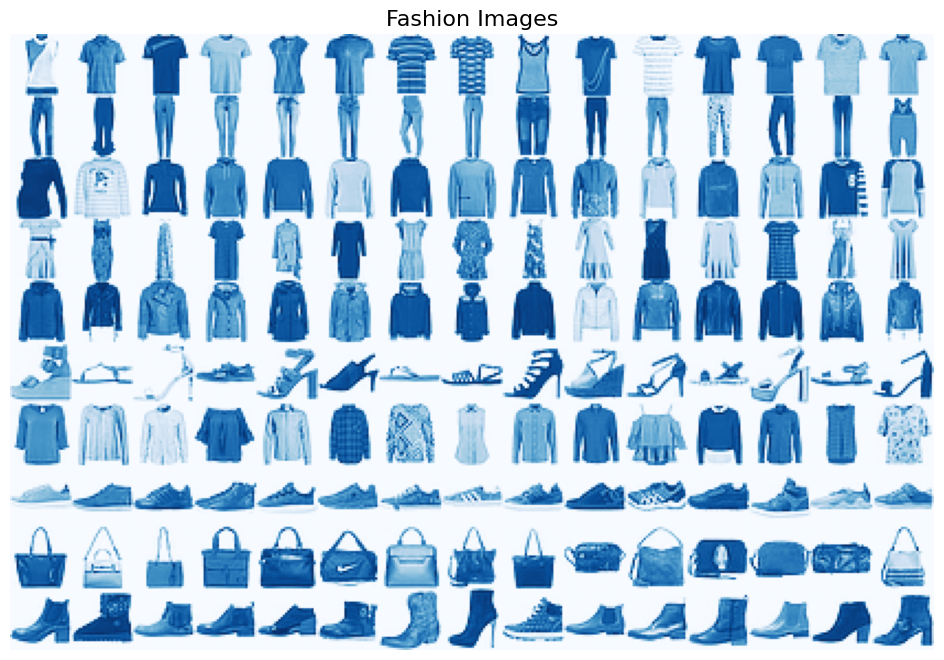

In [ ]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [ ]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(max_iter=2000, tol=0.001)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, tol=0.001)

In [ ]:
y_pred = model.predict(X_test)
f1_ = f1_score(y_test, y_pred, average="weighted")
f1_

0.7381424298005053

**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:**

**f1_score** - гармоническое среднее между  `precision (точность)` и `recall (полнота)`. Это метрика качества классификации.

$$ f1 = \frac{2 \cdot precision \cdot recall}{precision + recall} $$, где

$$ precision = \frac{TP}{TP + FP} $$

 Доля "верных" положительных классов, среди всех положительных, предсказанных моделью. `TP` - верные положительные, `FP` - ложные положительные

$$ recall = \frac{TP}{TP + FN} $$

Доля "верных" положительных классов, среди всех изначально положительных. `TP` - верные положительные, `FN` - ложные отрицательные

**Плюсы:**

- Работает хорошо с несбалансированными классами -> более справедливая, чем accuracy (`TN` не участвует в дисбалансе)

**Минусы:**

- Усреднение в многоклассовом случае может скрывать проблемы по отдельным классам.

Параметры `micro`, `macro`, `weighted` нужны для многоклассовой задачи. В такой задаче F1 score считается по каждому из классов и агрегируются с помощью micro, macro, weighted усреднения.

Параметр `average='weighted'`:

- Берём взвешенное среднее F1 по классам
- Веса пропорциональные количеству объектов каждого класса
- Часто встречающиеся классы влияют на итог сильнее редких

Мы используем `weighted`, так как это позволяет и оценить реальное распределение классов в данных, и качество классификации по каждому классу

Другие варианты `average`:

- `'macro'` — считаем F1 по каждому классу и усредняем без весов - все классы равны по важности;
  $$ Macro = \frac{1}{K} \sum{metric_k} $$
  - Модель плохо работает на редком классе - Macro падает
  - Хорошо показывает качество по классам. Хорошо использовать при несбалансированных классах

- `'micro'` — считаем общие TP/FP/FN по всем классам и считаем один F1;
  - Показывает общее качество классификации по объектам и почти не чувствительна к дисбалансу

- `None` — возвращает массив F1 по каждому классу;
- `'samples'` — используется в задачах multi-label (несколько меток на объект).





Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

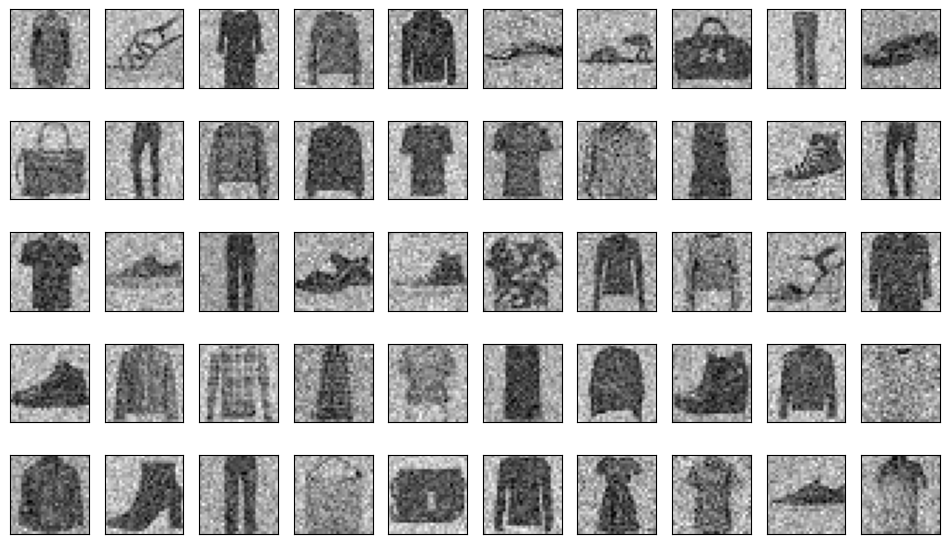

In [ ]:
scale = 100

X_test_noisy = X_test + np.random.normal(X_test, scale, X_test.shape)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Ваши выводы:**

C увеличением `scale` изображение становится все более зернистым и визуально труднее различимым для человека.

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
y_noisy_pred = model.predict(X_test_noisy)
f1_noisy = f1_score(y_test, y_noisy_pred, average="weighted")
f1_noisy

0.5381298848989231

In [ ]:
print(f"f1 score на изначальных тестовых данных: {f1_:.3f}")
print(f"f1 score на зашумленных тестовых данных: {f1_noisy:.3f}")

print(f"Ухудшение качества распознавания на {f1_-f1_noisy:.3f}")

f1 score на изначальных тестовых данных: 0.738
f1 score на зашумленных тестовых данных: 0.538
Ухудшение качества распознавания на 0.200


**Ваши выводы:**

Были зашумлены тестовые данные с использованием параметра scale=100

Качество распознавания (метрика f1 score) ухудшилось на 0.189

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

количество компонент: 100


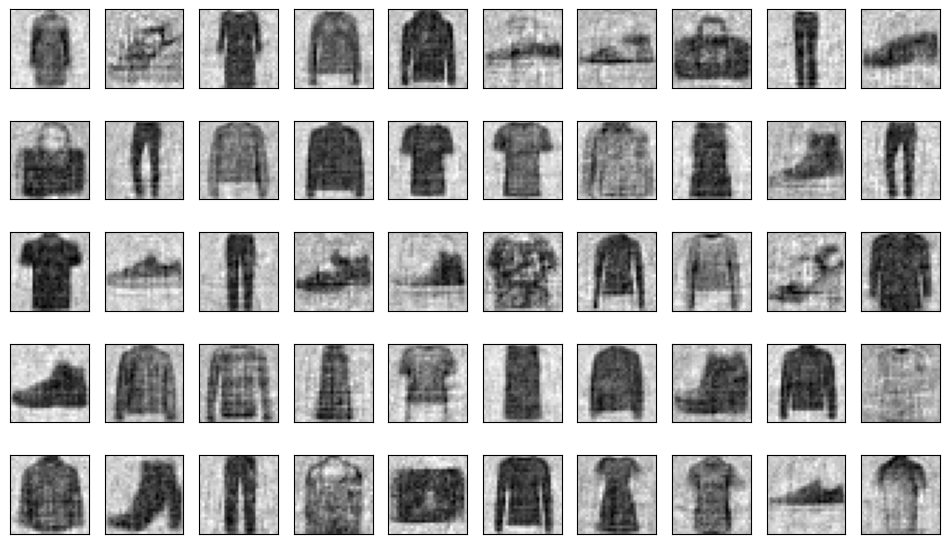

In [ ]:
from sklearn.decomposition import PCA

explained_variance = 0.7

pca = PCA(n_components=explained_variance, svd_solver='full', random_state=42)
X_test_noisy_low = pca.fit_transform(X_test_noisy)
restored_X_test_noisy = pca.inverse_transform(X_test_noisy_low)

print("количество компонент:", pca.n_components_)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

количество компонент: 378


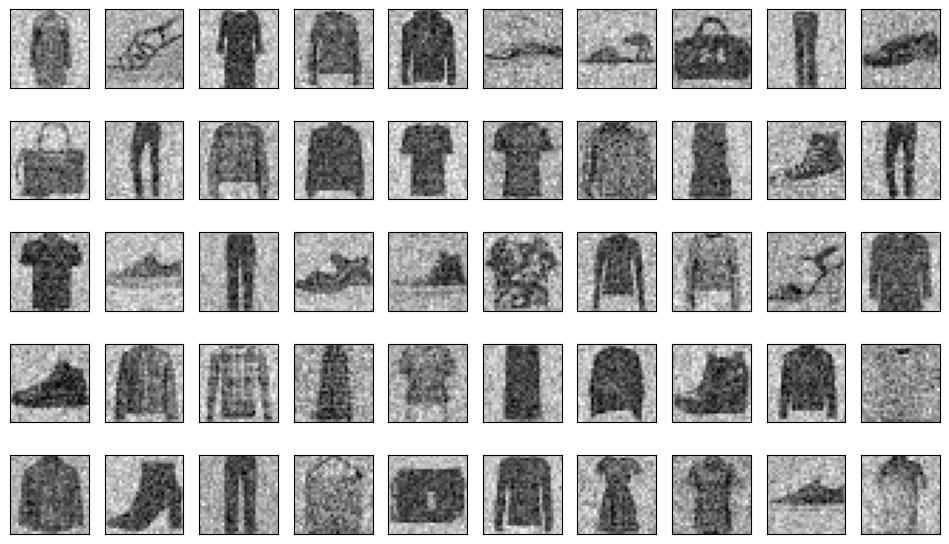

In [ ]:
from sklearn.decomposition import PCA

explained_variance = 0.9

pca = PCA(n_components=explained_variance, svd_solver='full', random_state=42)
X_test_noisy_low = pca.fit_transform(X_test_noisy)
restored_X_test_noisy = pca.inverse_transform(X_test_noisy_low)

print("количество компонент:", pca.n_components_)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Ваши выводы:**

Контуры изображений стали чуть чуть четче, повысилась контрастность. Зернистость изображений уменьшилась.

При уменьшении explained variance (определяет долю сохраненной информации) мы теряем детали изображений, они становятся размытыми, при этом сильно подавляется шум. При большой explained variance в восстановленное изображение возвращается шум.

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
y_pred_restored = model.predict(restored_X_test_noisy)
f1_restored = f1_score(y_test, y_pred_restored, average='weighted')

print(f"f1-score после восстановления PCA при explained_variance={explained_variance}: {f1_restored:.3f}")
print(f"Сравнение: чистые={f1_:.3f}, зашумлённые={f1_noisy:.3f}, после PCA={f1_restored:.3f}")

f1-score после восстановления PCA при explained_variance=0.9: 0.576
Сравнение: чистые=0.738, зашумлённые=0.538, после PCA=0.576


В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

In [ ]:
import numpy as np

scores = {}

for scale in range(50, 201, 50):
  scores[scale] = {}
  scores[scale]["var"] = []
  scores[scale]["f1"] = []
  X_test_noisy = X_test + np.random.normal(X_test, scale, X_test.shape)
  for var in np.arange(0.1, 1, 0.1):
    scores[scale]["var"].append(var)
    pca = PCA(n_components=var, svd_solver='full', random_state=42)
    X_test_noisy_low = pca.fit_transform(X_test_noisy)
    restored_X_test_noisy = pca.inverse_transform(X_test_noisy_low)
    y_pred_restored = model.predict(restored_X_test_noisy)
    f1_restored = f1_score(y_test, y_pred_restored, average='weighted')
    scores[scale]["f1"].append(round(f1_restored, 2))

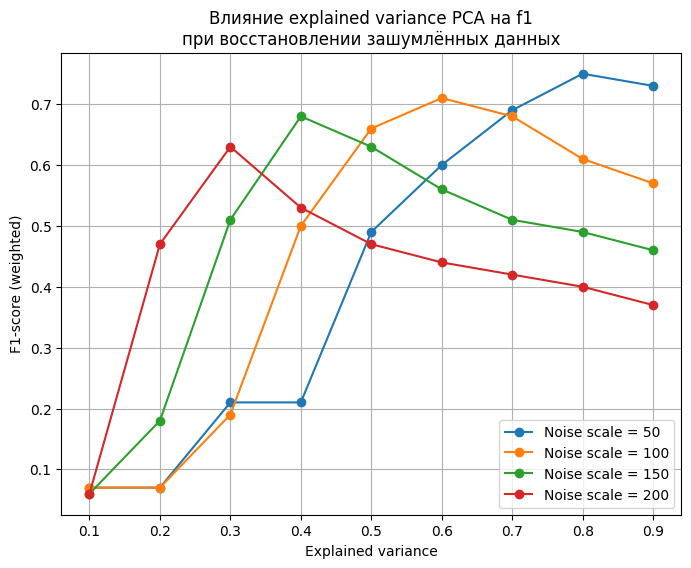

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for scale, data in scores.items():
    plt.plot(
        data["var"],
        data["f1"],
        marker='o',
        label=f'Noise scale = {scale}'
    )

plt.xlabel('Explained variance')
plt.ylabel('F1-score (weighted)')
plt.title('Влияние explained variance PCA на f1\nпри восстановлении зашумлённых данных')
plt.legend()
plt.grid(True)

plt.show()

**Ваши выводы:**

При увеличении scale качество классификации на зашумлённых данных снижается по сравнению с результатами на чистом тестовом наборе, что приводит к уменьшению значения метрики f1. Применение PCA с последующим восстановлением данных позволяет частично компенсировать влияние шума и улучшить качество классификации, однако полностью достичь уровня качества на чистых данных не удаётся.

Слишком малая доля explained variance приводит к потере значительной части полезной информации, а слишком большая - к недостаточному подавлению шума. Наилучшее качество достигается при промежуточных значениях explained variance, где обеспечивается компромисс между сохранением структуры данных и фильтрацией шума.

В результате PCA может быть использован как простой и эффективный метод предобработки для повышения устойчивости модели к шуму.

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ваш ответ:**

**Для SNE:**
$$
\mathbb{KL}(P|Q) = \sum\limits_{i, j}p_{ij} \log \frac{p_{ij}}{q_{ij}} = \sum\limits_{i, j}p_{ij} \log p_{ij} - \sum\limits_{i, j}p_{ij} \log q_{ij}.
$$

Первое слагаемое здесь является константой и далее при взятии градиента обратиться в 0. Введем также дополнительные обозначения:

$$
d_{ij} = ||y_i - y_j||,
Z = \sum\limits_{k \neq l} e^{-d_{ij}^2}
$$

Таким образом,

$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial y_i} = \sum\limits_j(\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}} + \frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ji}})(y_i - y_j) = 2\sum\limits_j(\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}})(y_i - y_j).
$$

$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl} \frac{\partial log(q_{kl})}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl} \frac{\partial log(q_{kl}Z) - log(Z)}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl}(\frac{\partial log(e^{-d_{kl}^2})}{\partial d_{ij}} - \frac{1}{Z}\frac{\partial Z}{\partial d_{ij}}) =
2p_{ij} + \sum\limits_{k \neq l}p_{kl}\frac{1}{Z}\frac{\partial \sum(e^{-d_{kl}^2})}{\partial d_{ij}} =
2p_{ij} - \sum\limits_{k \neq l}p_{kl} \frac{e^{-d_{ij}^2}}{Z} =
2p_{ij} - 2q_{ij} = 2(p_{ij} - q_{ij})
$$

Тогда,
$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial y_i} = 4\sum\limits_j(p_{ij} - q_{ij})(y_i - y_j)
$$

**Для T-SNE:**

$$
\mathbb{KL}(P|Q) = \sum\limits_{i, j}p_{ij} \log \frac{p_{ij}}{q_{ij}} = \sum\limits_{i, j}p_{ij} \log p_{ij} - \sum\limits_{i, j}p_{ij} \log q_{ij}.
$$

Первое слагаемое здесь является константой и далее при взятии градиента обратиться в 0. Введем также дополнительные обозначения:

$$
d_{ij} = ||y_i - y_j||,
Z = \sum\limits_{k \neq l} \frac{1}{1 + d_{kl}^2}
$$

Таким образом,

$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial y_i} = \sum\limits_j(\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}} + \frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ji}})(y_i - y_j) = 2\sum\limits_j(\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}})(y_i - y_j).
$$

$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl} \frac{\partial log(q_{kl})}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl} \frac{\partial log(q_{kl}Z) - log(Z)}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl}(\frac{1}{q_{kl}Z}\frac{\partial \frac{1}{1 + d_{kl}^2}}{\partial d_{ij}} - \frac{1}{Z}\frac{\partial Z}{\partial d_{ij}}) =
\frac{2p_{ij}}{q_{ij}Z(1 + d_{ij}^2)^2} - 2\sum\limits_{k \neq l}p_{kl}\frac{\frac{1}{(1 + d_{kl}^2)^2}}{Z} =
\frac{2p_{ij}}{(1 + d_{ij}^2)} - 2\frac{q_{ij}}{(1 + d_{ij}^2)} =
2\frac{(p_{ij} - q_{ij})}{(1 + d_{ij}^2)}
$$

Тогда,
$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial y_i} = 4\sum\limits_j\frac{(p_{ij} - q_{ij})(y_i - y_j)}{1 + ||y_i - y_j||^2}
$$

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [20]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [ ]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6.2960960997952e-29
        x: [ 2.000e+00 -1.000e+00]
      nit: 4
      jac: [ 1.510e-14 -4.885e-15]
 hess_inv: [[ 9.500e-01 -1.500e-01]
            [-1.500e-01  5.500e-01]]
     nfev: 5
     njev: 5

In [ ]:
import pandas as pd
import numpy as np

k = 10
n_dimensions = 2

# Вычисляем попарную близость (pairwise affinities).
# На вход принимается данные в формате np.array и perplexity (по умолчанию 30)
# Возвращается np.array - массив значений p_i|j

def compute_pairwise_affinities(X, k = 30):
  n = len(X)
  pair_affs = np.zeros((n, n)) # близость i-ой точки к j-ой в многомерном пространстве
  diffs = np.zeros((n, n)) # расстояния между точками в многомерном пространстве

  # Расстояния между точками
  for i in range(n):
    for j in range(n):
      if i != j:
        diffs[i, j] = np.linalg.norm(X[i] - X[j])
      else:
        diffs[i, j] = np.inf

  # Вероятности как p_i|j = 1/k для k ближайших соседей; 0 для остальных
  for i in range(n):
    closest_indices = np.argsort(diffs[i])[:k]
    pair_affs[i, closest_indices] = 1.0 / k

  return pair_affs


pair_affs = compute_pairwise_affinities(np.array(data), 20)
print(pair_affs)

[[0.   0.   0.   ... 0.05 0.   0.05]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.05 0.   0.  ]
 ...
 [0.   0.   0.05 ... 0.   0.   0.  ]
 [0.   0.   0.05 ... 0.05 0.   0.  ]
 [0.05 0.   0.   ... 0.   0.   0.  ]]


In [ ]:
# Вычисляем совместную вероятность p_ij
# На вход принимается массив попарных близостей P_i|j в формате np.array
# Возвращается массив совместных вероятностей p_ij в формате np.array

def set_pij(pair_affs):
  n = pair_affs.shape[0]
  p_ij = np.zeros(shape = pair_affs.shape)

  for i in range (n):
    for j in range (n):
      p_ij[i, j] = (pair_affs[i, j] + pair_affs[j, i]) / (2 * n)

  return p_ij

p_ij = set_pij(pair_affs)
print(p_ij)

[[0.         0.         0.         ... 0.00041667 0.         0.00083333]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00083333 0.00041667 0.        ]
 ...
 [0.00041667 0.         0.00083333 ... 0.         0.00041667 0.        ]
 [0.         0.         0.00041667 ... 0.00041667 0.         0.        ]
 [0.00083333 0.         0.         ... 0.         0.         0.        ]]


In [ ]:
# Инициализируем начальное решение y
# На вход принимает число объектов n и число измерений n_dimensions (по умолчанию 2)
# Возвращает массив случайных значений y

def initialize_y(n, n_dimensions = 2):
  return np.random.normal(0,scale=1e-2,size=(len(X),n_dimensions))

initial_y = initialize_y(X.shape[0])
print(initial_y[:7])

[[-0.00687532 -0.00142822]
 [ 0.00562364  0.00396696]
 [ 0.00187918  0.00886083]
 [-0.00867783 -0.01392263]
 [ 0.01205171 -0.00874431]
 [ 0.01051609  0.00449547]
 [-0.0114842  -0.01831857]]


In [ ]:
# Вычисляем близости q_ij в маломерном пространстве
# На вход принимается массив точек в Y как Np.array и метод как строка ('SNE', 'T-SNE'), по умолчанию 'T-SNE'
# Возвращает массив близостей q_ij

def compute_low_dim_affinities(Y, SNE_method = 'T-SNE'):
  n = len(Y)
  q_ij = np.zeros((n, n)) # близость i-ой точки к j-ой в маломерном пространстве

  # Расстояния между точками
  for i in range(n):
    for j in range(n):
      diff = np.linalg.norm(Y[i] - Y[j])

      if SNE_method == 'SNE':
        q_ij[i, j] = np.exp(-(diff ** 2))
      if SNE_method == 'T-SNE':
        q_ij[i, j] = 1.0 / (1 + (diff ** 2))

  np.fill_diagonal(q_ij, 0)
  q_ij = q_ij / q_ij.sum()

  return q_ij

q_ij = compute_low_dim_affinities(initial_y)
print(q_ij)

In [ ]:
# Вычисляем минимизируемую функцию и градиент
# На вход принимаются массивы p_ij, q_ij, Y и метод как строка ('SNE', 'T-SNE'), по умолчанию 'T-SNE'
# Вовзращает значение KL и градиент как одномерный массив

def compute_KL_and_gradient(Y, p_ij, method = 'T-SNE'):
  n = len(p_ij)
  Y = Y.reshape(n, 2)
  m = Y.shape[1]

  q_ij = compute_low_dim_affinities(Y)


  gradient = np.zeros((n, m))

  KL = np.sum(p_ij * np.log((p_ij + 10 ** (-22)) / (q_ij + 10 ** (-22))))

  for i in range(n):
    grad_i = np.zeros(m)
    for j in range(n):
      if i != j:
        if method == 'SNE':
          grad_ij = 4 * (p_ij[i, j] - q_ij[i, j]) * (Y[i] - Y[j])

        if method == 'T-SNE':
          d_ij = (np.linalg.norm(Y[i] - Y[j]))**2
          grad_ij = 4 * (p_ij[i, j] - q_ij[i, j]) * (Y[i] - Y[j]) * ((1 + d_ij) ** (-1))

        grad_i += grad_ij

    gradient[i] = grad_i

  return KL, gradient.ravel()

KL, gradient = compute_KL_and_gradient(initial_y.ravel(), p_ij)
print(KL)
print(gradient[:7])

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

In [10]:
!pip install -q openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 32.7 MB/s eta 0:00:00


In [25]:
from openTSNE import TSNE as openTSNE

import time
from tqdm.notebook import tqdm

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

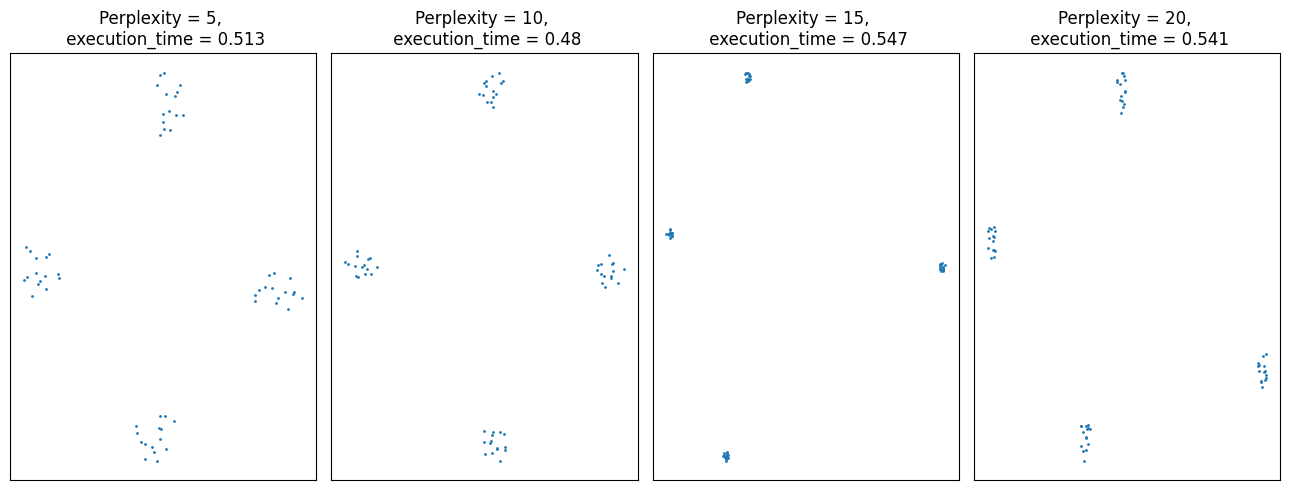

In [44]:
def perplexity(X, perplexities):

    fig, axes = plt.subplots(1, 4, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, perplexity in enumerate(perplexities):
      start_time = time.time()
      tsne = openTSNE(
            n_components=2,
            perplexity=perplexity,
            random_state=42)

      X_embedded = tsne.fit(X)
      X_embedded = X_embedded.transform(X)
      end_time = time.time()
      execution_time = end_time - start_time

      axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
      axes[i].set_title(f'Perplexity = {perplexity}, \n execution_time = {round(execution_time, 3)}')

    plt.tight_layout()
    plt.show()

perplexity(X, [5, 10, 15, 20])

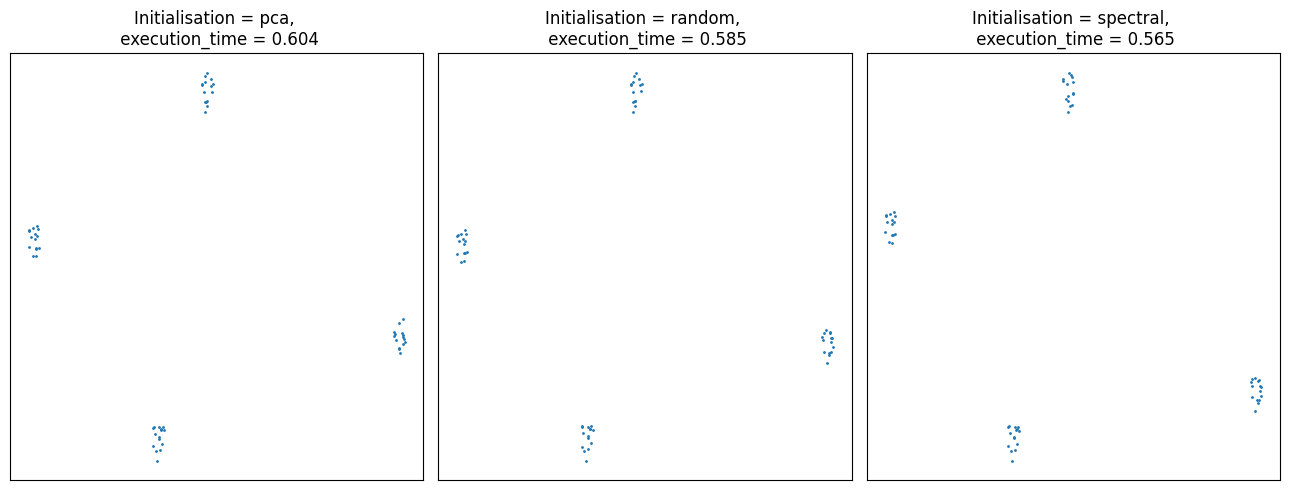

In [54]:
def initialisation(X):
    initialisations = ['pca','random','spectral']

    fig, axes = plt.subplots(1, 3, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, init in enumerate(initialisations):
        start_time = time.time()
        tsne = openTSNE(
            n_components=2,
            perplexity=19,
            random_state=42,
            initialization = init
        )

        X_embedded = tsne.fit(X)
        X_embedded = X_embedded.transform(X)
        end_time = time.time()
        execution_time = end_time - start_time

        axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
        axes[i].set_title(f'Initialisation = {init}, \n execution_time = {round(execution_time, 3)}')

    plt.tight_layout()
    plt.show()

initialisation(X)

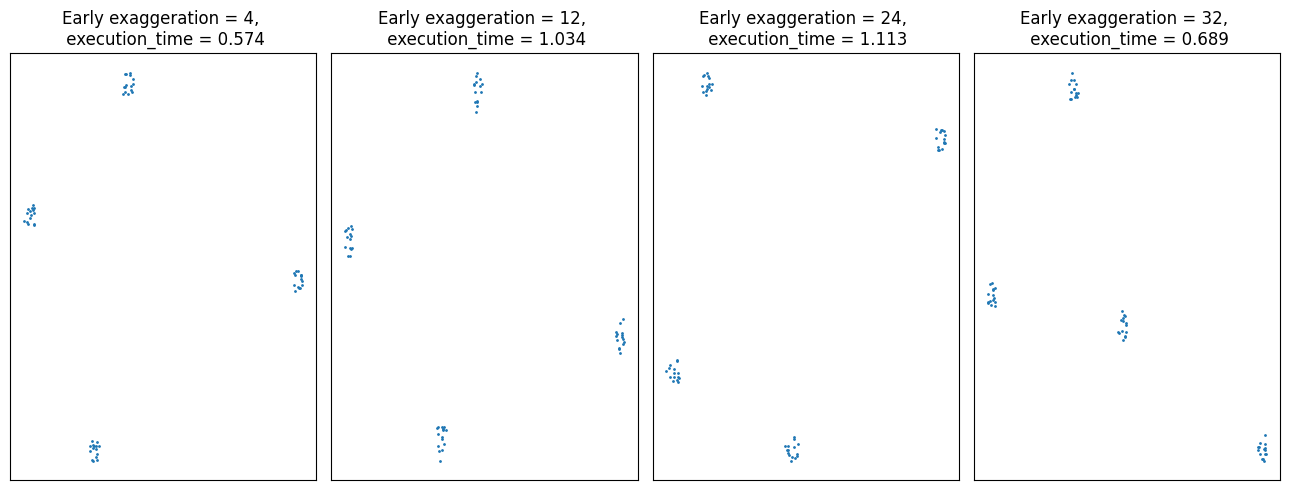

In [46]:
def early_exaggeration(X, early_exaggerations):

    fig, axes = plt.subplots(1, 4, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, early_ex in enumerate(early_exaggerations):
        start_time = time.time()
        tsne = openTSNE(
            n_components=2,
            perplexity=19,
            early_exaggeration=early_ex,
            random_state=42
        )

        X_embedded = tsne.fit(X)
        X_embedded = X_embedded.transform(X)
        end_time = time.time()
        execution_time = end_time - start_time

        axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
        axes[i].set_title(f'Early exaggeration = {early_ex}, \n execution_time = {round(execution_time, 3)}')

    plt.tight_layout()
    plt.show()

early_exaggeration(X, [4, 12, 24, 32])

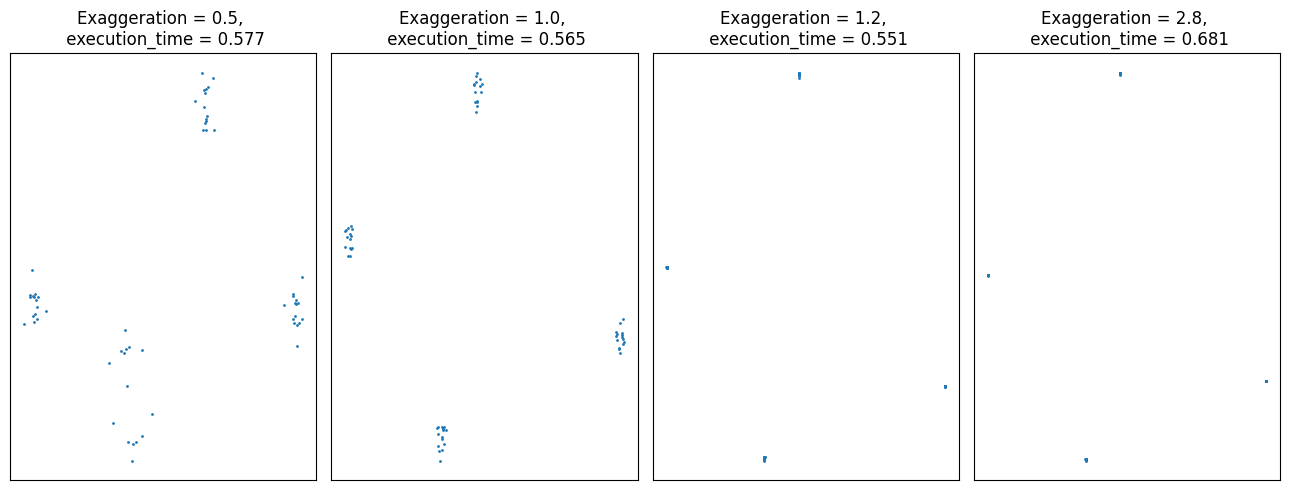

In [47]:
def exaggeration(X, exaggerations):

    fig, axes = plt.subplots(1, 4, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, exaggeration in enumerate(exaggerations):
        start_time = time.time()
        tsne = openTSNE(
            n_components=2,
            perplexity=19,
            exaggeration=exaggeration,
            random_state=42
        )

        X_embedded = tsne.fit(X)
        X_embedded = X_embedded.transform(X)
        end_time = time.time()
        execution_time = end_time - start_time

        axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
        axes[i].set_title(f'Exaggeration = {exaggeration}, \n execution_time = {round(execution_time, 3)}')

    plt.tight_layout()
    plt.show()

exaggeration(X, [0.5, 1.0, 1.2, 2.8])

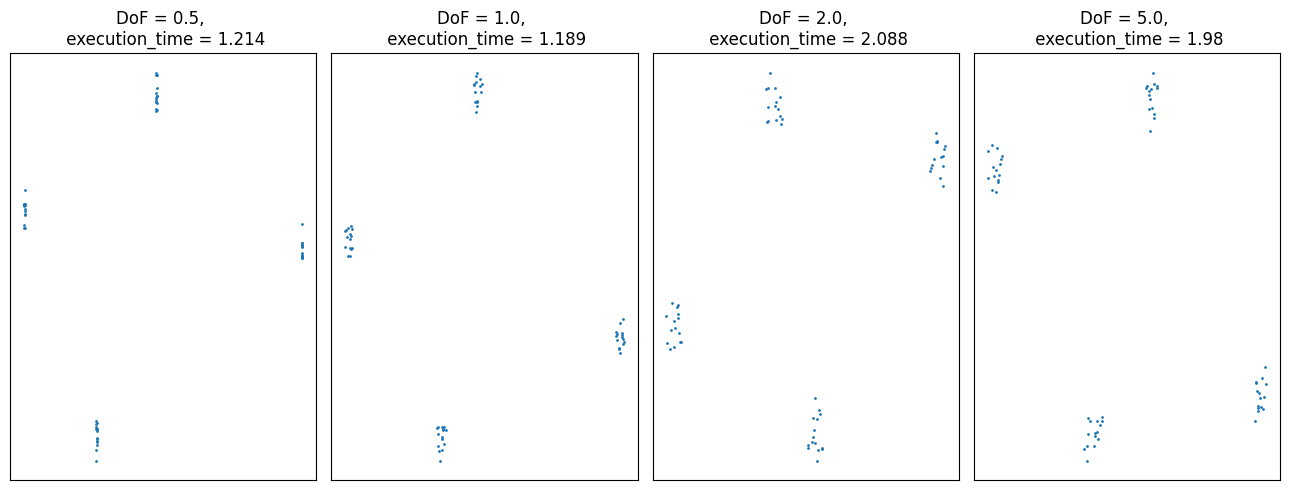

In [48]:
def dof(X, dofs):

    fig, axes = plt.subplots(1, 4, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, dof in enumerate(dofs):
        start_time = time.time()
        tsne = openTSNE(
            n_components=2,
            perplexity=19,
            random_state=42,
            dof = dof
        )

        X_embedded = tsne.fit(X)
        X_embedded = X_embedded.transform(X)
        end_time = time.time()
        execution_time = end_time - start_time

        axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
        axes[i].set_title(f'DoF = {dof}, \n execution_time = {round(execution_time, 3)}')

    plt.tight_layout()
    plt.show()

dof(X, [0.5, 1.0, 2.0, 5.0])

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import tensorflow as tf

In [41]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (_, _) = mnist.load_data()
print(train_images.shape)

(60000, 28, 28)


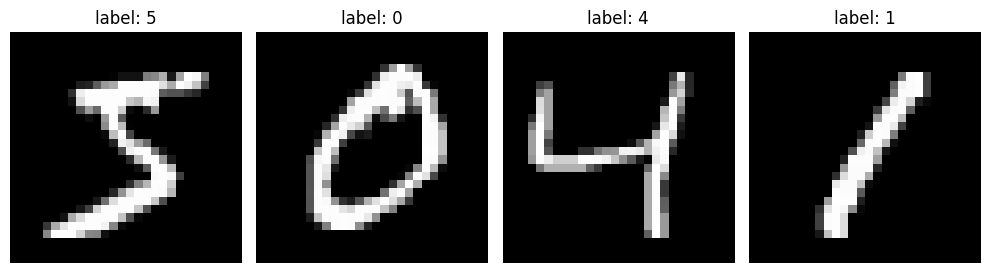

In [49]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

train_dataset = train_images.reshape(train_images.shape[0], -1)

samples = 5000
indices = np.random.choice(train_images.shape[0], samples, replace=False)
X_sample = train_dataset[indices]
y_sample = train_dataset[indices]

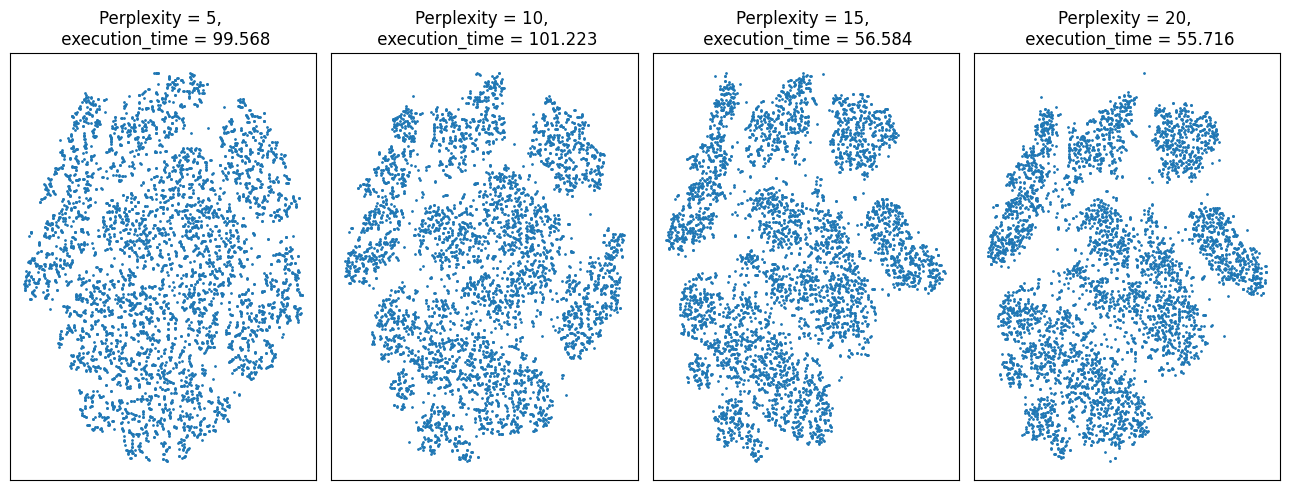

In [50]:
perplexities = [5, 10, 15, 20]
perplexity(X_sample, perplexities)

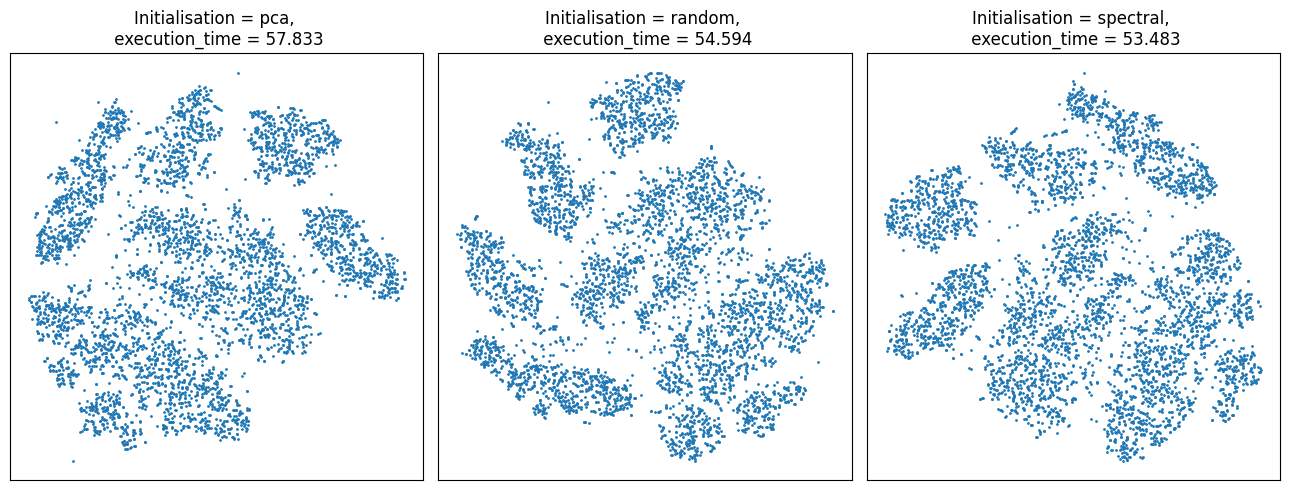

In [55]:
initialisation(X_sample)

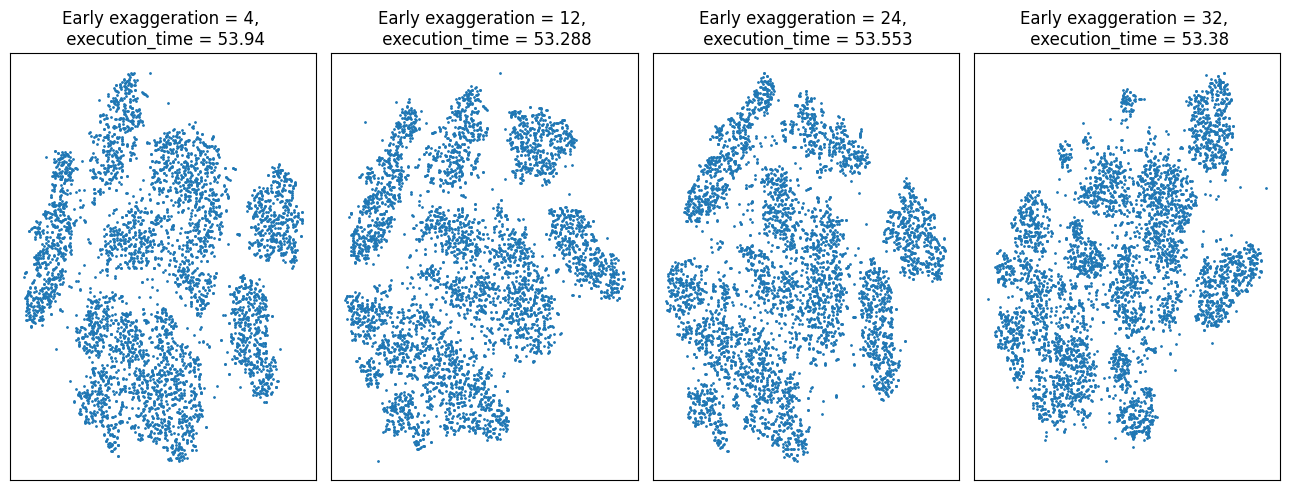

In [56]:
early_exaggerations = [4, 12, 24, 32]
early_exaggeration(X_sample, early_exaggerations)

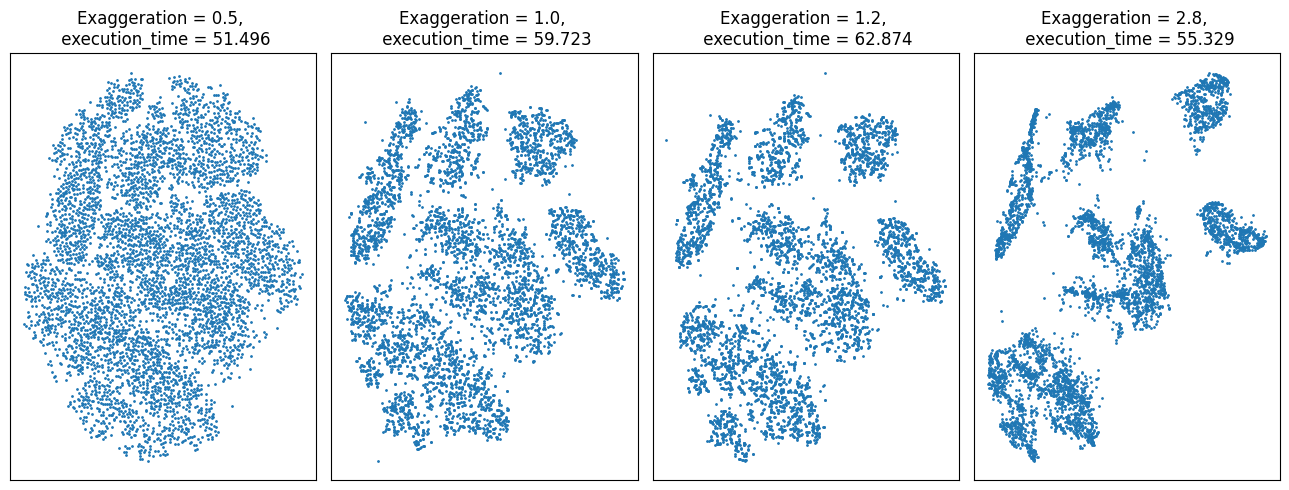

In [57]:
exaggerations = [0.5, 1.0, 1.2, 2.8]
exaggeration(X_sample, exaggerations)

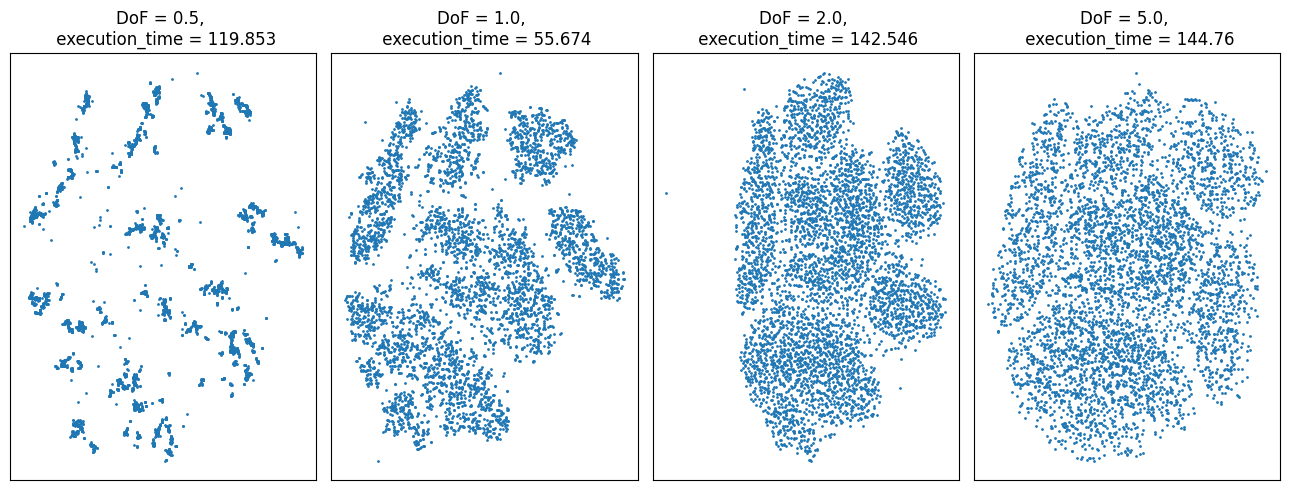

In [58]:
dofs = [0.5, 1.0, 2.0, 5.0]
dof(X_sample, dofs)